<a href="https://colab.research.google.com/github/Yukiharossauro/burn_out_project/blob/main/burn_out_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Accessing Kaggle API

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/scripts Python/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/scripts Python/Kaggle

/content/gdrive/My Drive/scripts Python/Kaggle


In [4]:
!kaggle datasets download -d blurredmachine/are-your-employees-burning-out

are-your-employees-burning-out.zip: Skipping, found more recently modified local copy (use --force to force download)


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Importing data

In [3]:
url_train = '/content/gdrive/MyDrive/scripts_Python/Kaggle/train.csv'

In [4]:
df_train = pd.read_csv(url_train)

# What is Burnout Syndrome?

By the definition of the website: https://www.helpguide.org/articles/stress/burnout-prevention-and-recovery.htm#:~:text=Burnout%20is%20a%20state%20of,unable%20to%20meet%20constant%20demands.

"Burnout is a state of emotional, physical, and mental exhaustion caused by excessive and prolonged stress. It occurs when you feel overwhelmed, emotionally drained, and unable to meet constant demands. As the stress continues, you begin to lose the interest and motivation that led you to take on a certain role in the first place.

Burnout reduces productivity and saps your energy, leaving you feeling increasingly helpless, hopeless, cynical, and resentful. Eventually, you may feel like you have nothing more to give.

The negative effects of burnout spill over into every area of life—including your home, work, and social life. Burnout can also cause long-term changes to your body that make you vulnerable to illnesses like colds and flu. Because of its many consequences, it’s important to deal with burnout right away."



# Motivation

In the context of new pandemic situation, Burnout may be one of the most commom mental disorders.

There is literally no disconnection of work and home environment. Workers are being pushed to their limits of productivity. So that understanding the problem is mandatory for every company.

This project tries to translate data from  https://www.kaggle.com/blurredmachine/are-your-employees-burning-out?select=train.csv into usefull information.

# Objectives

1 - Understand the variables in the dataset

2 - Understand the relationship between the data

3 - Explora data visualization only using the lib PLOTLY

4 - Build a Machine Learning model to predict the Burn Out Value of a certain worker considering mean absolute error as the loss function


     4.1 - Check the necessity of normalizing data

     4.2 - Check necessity of dropping columns or create new variables




# Exploratory analysis

## Data information

**Employee ID:** The unique ID allocated for each employee (example: fffe390032003000)


**Date of Joining:** The date-time when the employee has joined the organization (example: 2008-12-30)


**Gender:** The gender of the employee (Male/Female)


**Company Type:** The type of company where the employee is working (Service/Product)


**WFH Setup Available:** Is the work from home facility available for the employee (Yes/No)


**Designation:** The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.


**Resource Allocation:** The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)


**Mental Fatigue Score:** The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.


**Burn Rate:** The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

## Exploring DataFrame

Let`s remove blank spaces and set lower method for column names first

In [5]:
df_train.columns = df_train.columns.str.replace(' ','_')

In [6]:
df_train.columns = df_train.columns.str.lower()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           22750 non-null  object 
 1   date_of_joining       22750 non-null  object 
 2   gender                22750 non-null  object 
 3   company_type          22750 non-null  object 
 4   wfh_setup_available   22750 non-null  object 
 5   designation           22750 non-null  float64
 6   resource_allocation   21369 non-null  float64
 7   mental_fatigue_score  20633 non-null  float64
 8   burn_rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


We have 5 categorical columns and 4 numerical.

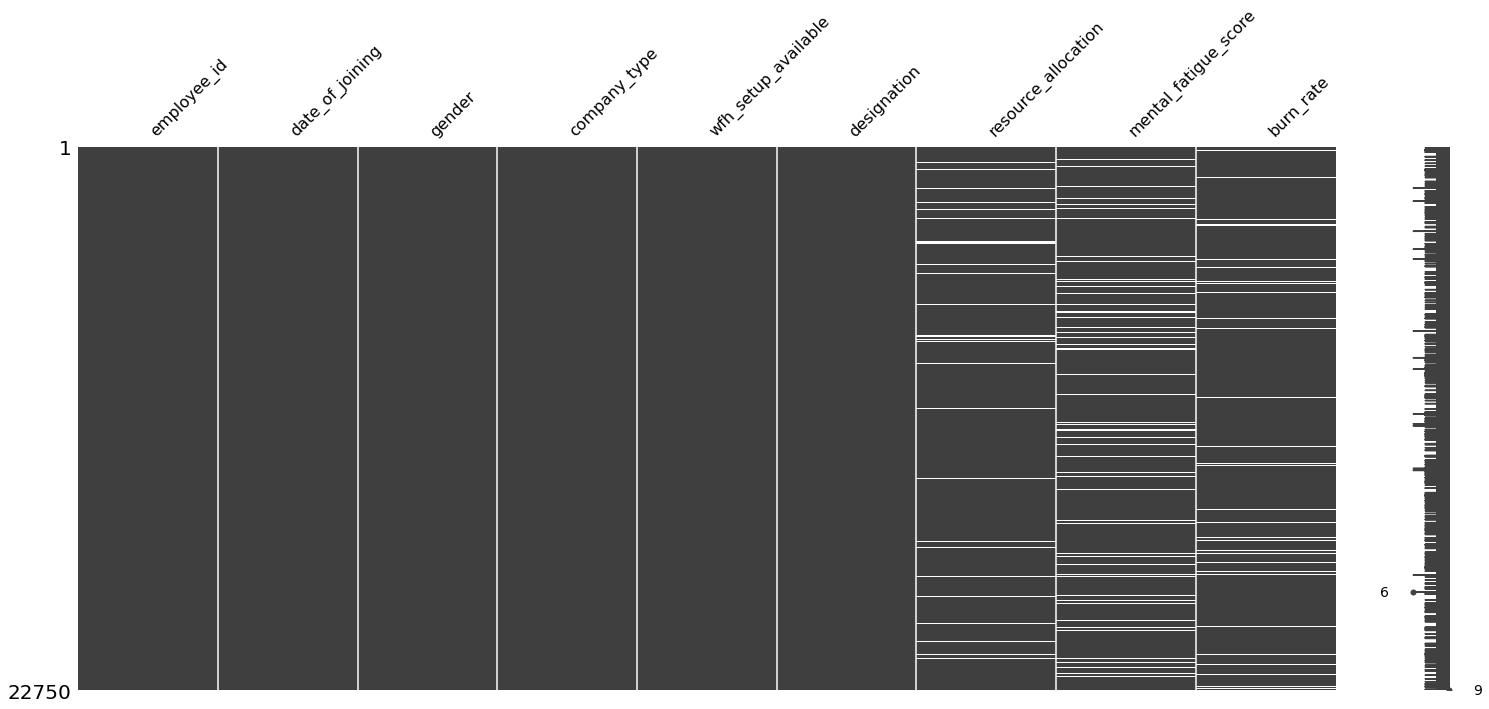

In [8]:
msno.matrix(df_train)

The last 3 columns have null values. Let`s check the % of null data.

In [9]:
for col in df_train.columns:
    x = df_train[col].isnull().sum()
    y = len(df_train)
    z = (x/y)
    if z > 0:
        print(f'The column {col} has {z*100:.2f} % of null data')


The column resource_allocation has 6.07 % of null data
The column mental_fatigue_score has 9.31 % of null data
The column burn_rate has 4.94 % of null data


In [10]:
df_train.describe()

,designation,resource_allocation,mental_fatigue_score,burn_rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


We see that the range of numerical columns are a little different. Probably we would need to normalize then later.

In [11]:
df_train.shape

(22750, 9)

9 columns and 22750 samples of data

# Exploring Variables

## How many patients we have?

In [12]:
len(df_train.employee_id.unique())

22750

We have 22750 different person id.

## What`s the proportion of patients by gender?

In [13]:
fig = px.pie(data_frame = df_train, values = df_train.gender.value_counts(), names = df_train.gender.value_counts().index, title = 'Patients by gender' )
fig.show()

Women represent more than half of the dataset.

## What`s the proportion of patients by company type?


In [14]:
fig = px.pie(data_frame = df_train, values = df_train.company_type.value_counts(), names = df_train.company_type.value_counts().index, title = 'Patients by company type' )
fig.show()

### How many patients are there in each company type per gender?

In [15]:
fig = px.histogram(data_frame=df_train,x='gender', color='gender',facet_col='company_type')
fig.show()

In general we have more women in the dataset. Product companies are less frequent in the dataset.

## Is it possible for the worker to do Home Office?

In [16]:
fig = px.histogram(data_frame = df_train, x = 'wfh_setup_available', title = 'Is Home Office available?', color_discrete_sequence=px.colors.qualitative.Dark24, color = 'wfh_setup_available')
fig.update_layout(showlegend=False)
fig.update_xaxes(showticklabels=True,title='')
fig.update_yaxes(title='Number of patients')
fig.show()

More than half of the patients are able to work from home.

### Does this distribution change in different company types and among gender?

In [17]:
fig = px.histogram(data_frame = df_train, x = 'wfh_setup_available', title = 'Is Home Office available?', color='gender',
                   facet_col='company_type',barmode='group')
fig.update_layout(showlegend=True)
fig.update_xaxes(showticklabels=True,title='')
fig.update_yaxes(title='Number of patients',row=1,col=1)
fig.show()

It is possible to see that women has more access to home office than men.

## How is the distribution of seniority among the dataset?

In [18]:

fig = px.histogram(data_frame= df_train, x = 'designation', nbins = 10, title = 'Distribution of seniority level')
fig.update_yaxes(title= 'Number of patients')
fig.update_xaxes(title = 'Seniority Level')
fig.show()

### Does the distribuiton change when we input company type and gender?

In [19]:
fig = px.histogram(data_frame= df_train, x = 'designation', nbins = 10, title = 'Distribution of seniority level', facet_col='company_type',color='gender',histnorm='probability')
fig.update_yaxes(title= 'Number of patients')
fig.update_xaxes(title = 'Seniority Level')
fig.show()

No change among the seniority level.

## Whats the distribution of work hours among the dataset?

In [20]:
fig = px.histogram(data_frame=df_train, x = 'resource_allocation', color_discrete_sequence=  ['Black'], opacity= 0.6, nbins = 10, marginal= 'box',title='Working hour among the dataset')
fig.update_xaxes(title_text = 'Working hours allocated per day', row = 1, col = 1)
fig.update_yaxes(title_text = 'Number of patients', row = 1, col = 1,title_standoff=30)
fig.update_layout(showlegend=False,)
fig.show()

### Any change in the distribution when we input gender and company type?

In [21]:
fig = px.histogram(data_frame=df_train, x = 'resource_allocation', nbins = 10, marginal= 'box',title='Working hour among the dataset',facet_col='company_type',color='gender',histnorm='probability')
fig.update_xaxes(title_text = 'Working hours allocated per day', row = 1, col = 1)
fig.update_layout(showlegend=True)
fig.update_yaxes(title_text = 'Number of patients', row = 1, col = 1,title_standoff=30)

fig.show()

No big difference in working hours.

## What`s the distribution of mental fatigue among the dataset?

In [22]:
fig = px.histogram(data_frame=df_train, x = 'mental_fatigue_score', color_discrete_sequence= ['Brown'], opacity=0.6, marginal= 'box',title='Mental fatigue score among the dataset')
fig.update_xaxes(title = 'Mental fatigue score', row = 1, col = 1)
fig.update_yaxes(title = 'Number of patients', row = 1, col = 1,title_standoff=30)
fig.update_xaxes(tickvals = [0,1,2,3,4,5,6,7,8,9,10])
fig.show()

The mental fatigue median is above 5. Lower mental fatigue is less present (25% of dataset is under 5 mental fatigue score).

### What`s the distribution when we input other categorical data?

In [23]:
fig = px.histogram(data_frame=df_train,x='mental_fatigue_score', color='gender',
                   title='Facet Histogram of Mental Fatigue Score',
                   facet_col='company_type',facet_row='wfh_setup_available',
                   histnorm='probability',
                   color_discrete_map=dict(Male='Blue',Female='Red'),opacity =0.6) 
fig.update_xaxes(title='Mental Fatigue - Service Companies - With and Withoud Home Office availability', row=1,col=1)
fig.update_xaxes(title='Mental Fatigue - Product Companies - With and Withoud Home Office availability', row=1,col=2)
fig.update_yaxes(title='Normalized curve of patients',row=1,col=1,title_font={'size':10})
fig.update_yaxes(title='Normalized curve of patients',row=2,col=1,title_font={'size':10})
fig.show()

Mental fatigue is more correlated to home office than company type.

## What`s the distribution of burn out rate among the dataset?

In [24]:
fig = px.histogram(data_frame= df_train, x = 'burn_rate', marginal = 'box', color_discrete_sequence= ['Black'], opacity = 0.8,title='Burn out rate among the dataset')
fig.update_xaxes(title = 'Burn out rate', row = 1, col=1,title_standoff=40)
fig.update_yaxes(title='Number of patients',row=1,col=1,title_standoff=30)
fig.update_xaxes(tickvals=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
fig.show()

We have an homogeneous distribution of burn rate data.

### Is there any difference of Burn Rate distribution of men and women?

In [25]:
fig = px.histogram(data_frame= df_train, x = 'burn_rate', marginal = 'box', color='gender', opacity = 0.8,title='Burn out rate distribution by gender', color_discrete_map= {'Female':'Red','Male':'Blue'})
fig.update_xaxes(title = 'Burn out rate', row = 1, col=1,title_standoff=40)
fig.update_yaxes(title='Number of patients',row=1,col=1,title_standoff=30)
fig.update_xaxes(tickvals=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

fig.show()

Men has higher burn out rate than women in general.

### Additionally, what`s the distribution difference if we include company type and home office variable?


In [26]:
fig = px.histogram(data_frame=df_train,x='burn_rate',color='gender',
                   title='Facet Histogram of Burn out rate',
                   facet_col='company_type',facet_row='wfh_setup_available', 
                   histnorm='probability',
                   color_discrete_map=dict(Male='Blue',Female='Red'),opacity =0.6) 
fig.update_xaxes(title='Burn out rate - Service Companies - With and Withoud Home Office availability', row=1,col=1)
fig.update_xaxes(title='Burn out rate - Product Companies - With and Withoud Home Office availability', row=1,col=2)
fig.update_yaxes(title='Normalized curve of patients',row=1,col=1,title_font={'size':10})
fig.update_yaxes(title='Normalized curve of patients',row=2,col=1,title_font={'size':10})
fig.show()

On bothy compaty types there is the same trend. Home office availability show a very discrete pattern. Patients able to do home office are less influentiated by Burn out.

## Is the column ['date_of_joining'] important?

Let`s split year and check the distribution

In [27]:
df_train['list_date'] = df_train.date_of_joining.str.split(pat='-')

In [28]:
df_train['year_in'] = df_train.list_date.str.get(0)

In [29]:
df_train.year_in.unique()

array(['2008'], dtype=object)

The only year within the dataset is 2008, probably it will not bring any additional information to the exploration.

In [30]:
df_train.drop(columns=['list_date','year_in'],inplace=True)

## What`s the correlation between continuous variables?

Creating a dataframe with only continuous variables.

In [31]:
df_train_corr = df_train[['designation','resource_allocation','mental_fatigue_score','burn_rate']].corr()

For plotting the heatmap I`d rather use seaborn.

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

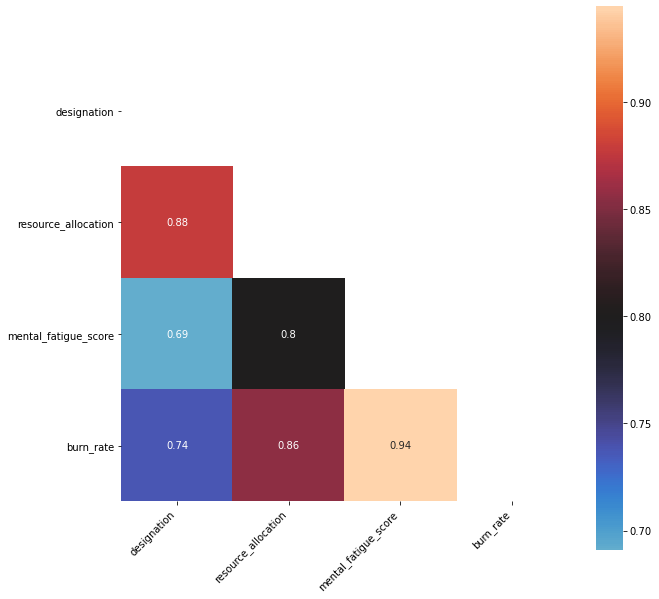

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df_train_corr, dtype=bool))
sns.heatmap(data=df_train_corr,square=True,annot=True,center=0.8,mask=mask)
plt.xticks(rotation=45,horizontalalignment='right')
plt.yticks(rotation=360)

Burn rate is highly correlated to the continuous variables within the dataset, which is a good thing.

Although, we also see high correlation between the variables. It may be a problem in the future, becase it can lead us to have unbalanced weights in modeling the ML model.

For now, let`s keep it all.

## Data exploration conclusion

Highlights

---

Service companies are more present in the dataset than product companies.


Women is more likely to have home office available to work.


Being able to do home office directly impacts mental fatigue and burn out rate positively.


The longer hours allocated, the more fatigue and burn out rate is the result.


Lowlights

---


Useless columns ['date_of_joining'], which does not bring any useful information.

# Machine Learning Modeling

## Importing libraries

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn import svm

## Data engineering

First drop the column date_of_joining

In [34]:
df_train.drop(columns=['date_of_joining'],inplace=True)

Transforming categorical data into binary.

In [35]:
df_train = pd.get_dummies(data=df_train,columns=['gender','company_type','wfh_setup_available'])

Some of the columns may be dropped after the method get_dummies. For example: gender_Male. That`s becaseu 0 in the column gender_Fermale is related to Men. 

In [36]:
df_train.drop(columns=['gender_Male','company_type_Product','wfh_setup_available_No'], inplace=True)

We have a lot of data, so let`s drop null values.

In [37]:
df_train.dropna(inplace=True)

In [38]:
df_train.head()

,employee_id,designation,resource_allocation,mental_fatigue_score,burn_rate,gender_Female,company_type_Service,wfh_setup_available_Yes
0,fffe32003000360033003200,2.0,3.0,3.8,0.16,1,1,0
1,fffe3700360033003500,1.0,2.0,5.0,0.36,0,1,1
3,fffe32003400380032003900,1.0,1.0,2.6,0.20,0,1,1
4,fffe31003900340031003600,3.0,7.0,6.9,0.52,1,1,0
5,fffe3300350037003500,2.0,4.0,3.6,0.29,0,0,1


Now, let`s set our features and target

In [39]:
df_train.columns

Index(['employee_id', 'designation', 'resource_allocation',
       'mental_fatigue_score', 'burn_rate', 'gender_Female',
       'company_type_Service', 'wfh_setup_available_Yes'],
      dtype='object')

But first, let`s shuffle to avoid order leaking.

In [40]:
df_train = df_train.sample(frac=1)

In [41]:
X = df_train[[ 'designation', 'resource_allocation','mental_fatigue_score','gender_Female','company_type_Service', 'wfh_setup_available_Yes']]
Y = df_train['burn_rate']

Now, let`s split our data between train and validation

In [42]:
seed = 1000
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=seed)

## Raw models

Below an empty dictionary with the values of Raw Models MAE.

In [43]:
raw_mae = {}

##### Random Forest Regressor

In [44]:
rfr = RandomForestRegressor(random_state=seed)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1000, verbose=0, warm_start=False)

In [45]:
rfr_pred = rfr.predict(x_val)

In [46]:
rfr_mae = metrics.mean_absolute_error(y_val,rfr_pred)
rfr_mae

0.04534644740607379

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



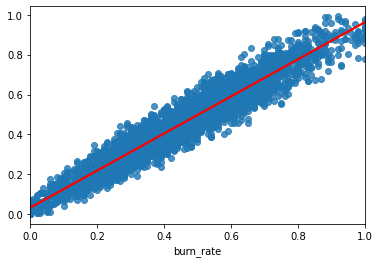

In [47]:
sns.regplot(y_val,rfr_pred,line_kws={'color':'red'})

For Random Forest Regressor we have a MAE of 5% and a very good linear fit.

In [48]:
raw_mae['rfr'] = rfr_mae

##### AdaBoost Regressor

In [49]:
abr = AdaBoostRegressor(random_state=seed)
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_val)
abr_mae = metrics.mean_absolute_error(y_val,abr_pred)
print(abr_mae)

0.05289308899043257


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



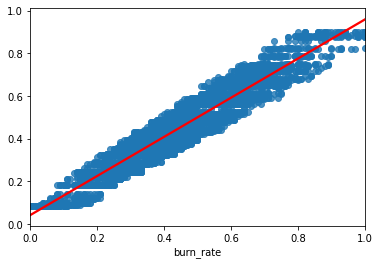

In [50]:
sns.regplot(y_val,abr_pred, line_kws={'color':'red'})

In [51]:
raw_mae['abr'] = abr_mae

##### XGBoost Regressor

In [52]:
xgb = XGBRegressor(random_state=seed)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_val)
xgb_mae = metrics.mean_absolute_error(y_val, xgb_pred)
print(xgb_mae)

[21:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.0435694916123918


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



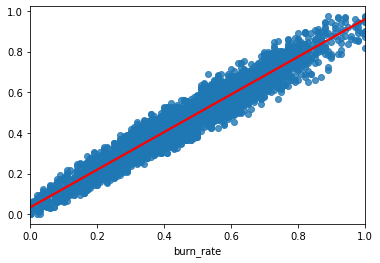

In [53]:
sns.regplot(y_val,xgb_pred, line_kws={'color':'red'})

In [54]:
raw_mae['xgb'] = xgb_mae

##### Ridge Regression

In [55]:
ridge = Ridge(random_state=seed)
ridge.fit(x_train,y_train)
ridge_pred = ridge.predict(x_val)
ridge_mae = metrics.mean_absolute_error(y_val, ridge_pred)
print(ridge_mae)

0.04562195575691822


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



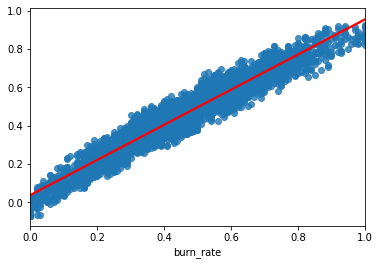

In [56]:
sns.regplot(y_val,ridge_pred, line_kws={'color':'red'})

In [57]:
raw_mae['ridge'] = ridge_mae

##### Support Vector Machine Regressor

In [58]:
svr = svm.SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_val)
svr_mae = metrics.mean_absolute_error(y_val,svr_pred)
print(svr_mae)

0.050260076400030565


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



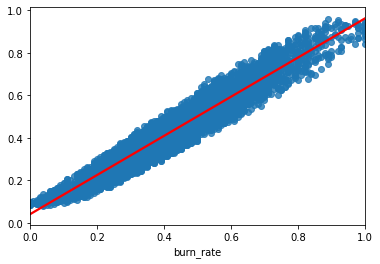

In [59]:
sns.regplot(y_val,svr_pred, line_kws={'color':'red'})

In [60]:
raw_mae['svr'] = svr_mae

##### Evaluating of Raw Models

In [61]:
raw_mae

{'abr': 0.05289308899043257,
 'rfr': 0.04534644740607379,
 'ridge': 0.04562195575691822,
 'svr': 0.050260076400030565,
 'xgb': 0.0435694916123918}

In [62]:
raw_model_mae = pd.DataFrame(list(raw_mae.items()))

In [63]:
raw_model_mae.columns = ['model', 'MAE']

In [64]:
raw_model_mae.sort_values(by='MAE',ascending=True)

,model,MAE
2,xgb,0.043569
0,rfr,0.045346
3,ridge,0.045622
4,svr,0.050260
1,abr,0.052893


A raw evaluation of the 5 models above shows that the best starting point is XGBoost Regressor and ridge.

## Tuning hyperparameters

### Tuning XGBoost Regressor

In [65]:
xgb_param = {'n_estimators':[100,150,200],'learning_rate':[0.01,0.05,0.1,0.2,0.5]}

In [66]:
xgb = XGBRegressor(random_state=seed)

In [67]:
xgb_grid = GridSearchCV(xgb, xgb_param, cv=5,scoring='neg_mean_absolute_error')

In [68]:
xgb_grid.fit(X,Y)

[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=1000,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200]},

#### Results

In [69]:
report = pd.DataFrame(xgb_grid.cv_results_)

In [70]:
report = report[['params','rank_test_score','mean_test_score']]

In [71]:
report.sort_values(by='rank_test_score')

,params,rank_test_score,mean_test_score
14,"{'learning_rate': 0.5, 'n_estimators': 200}",1,-0.042895
13,"{'learning_rate': 0.5, 'n_estimators': 150}",2,-0.042944
11,"{'learning_rate': 0.2, 'n_estimators': 200}",3,-0.043042
12,"{'learning_rate': 0.5, 'n_estimators': 100}",4,-0.043053
10,"{'learning_rate': 0.2, 'n_estimators': 150}",5,-0.043158
8,"{'learning_rate': 0.1, 'n_estimators': 200}",6,-0.043316
9,"{'learning_rate': 0.2, 'n_estimators': 100}",7,-0.043374
7,"{'learning_rate': 0.1, 'n_estimators': 150}",8,-0.043499
5,"{'learning_rate': 0.05, 'n_estimators': 200}",9,-0.043716
6,"{'learning_rate': 0.1, 'n_estimators': 100}",10,-0.043729


No big gains after tuning hyperparameters. Let`s now normalize the datas.

### Tuning Ridge Regressor

In [72]:
ridge_param = {'alpha':[4,10,50,100,150,200,400,1000,2000]}

In [73]:
ridge = Ridge(random_state=seed)
ridge_grid = GridSearchCV(ridge,ridge_param,scoring='neg_mean_absolute_error',cv=5)
ridge_grid.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=1000,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [4, 10, 50, 100, 150, 200, 400, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

#### Results

In [74]:
report = pd.DataFrame(ridge_grid.cv_results_)

In [75]:
report = report[['params','rank_test_score','mean_test_score']]
report.sort_values(by='rank_test_score')

,params,rank_test_score,mean_test_score
7,{'alpha': 1000},1,-0.045504
8,{'alpha': 2000},2,-0.045541
6,{'alpha': 400},3,-0.045552
5,{'alpha': 200},4,-0.045585
4,{'alpha': 150},5,-0.045595
3,{'alpha': 100},6,-0.045605
2,{'alpha': 50},7,-0.045616
1,{'alpha': 10},8,-0.045625
0,{'alpha': 4},9,-0.045627


No big gains here as well. The data is automatically normalized before fitting.

### Normalizing features

In [76]:
from sklearn import preprocessing

In [77]:
normalize_X = preprocessing.normalize(X)

In [78]:
xgb = XGBRegressor(random_state=seed)

In [79]:
xgb_grid = GridSearchCV(xgb, xgb_param, cv=5,scoring='neg_mean_absolute_error')

In [80]:
xgb_grid.fit(normalize_X,Y)

[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=1000,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200]},

In [81]:
report = pd.DataFrame(xgb_grid.cv_results_)
report = report[['params','rank_test_score','mean_test_score']]
report.sort_values(by='rank_test_score').head()

,params,rank_test_score,mean_test_score
11,"{'learning_rate': 0.2, 'n_estimators': 200}",1,-0.050916
14,"{'learning_rate': 0.5, 'n_estimators': 200}",2,-0.050952
13,"{'learning_rate': 0.5, 'n_estimators': 150}",3,-0.051276
10,"{'learning_rate': 0.2, 'n_estimators': 150}",4,-0.051385
8,"{'learning_rate': 0.1, 'n_estimators': 200}",5,-0.051827


Normalizing for XGBoost makes the MAE worse.

## Validating with the set of parameters

### XGBoost

In [82]:
xgb = XGBRegressor (random_state=seed, learning_rate=0.5,n_estimators=200)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_val)
xgb_mae = metrics.mean_absolute_error(y_val,xgb_pred)
xgb_mae

[21:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.04273265757792864

### Ridge

In [83]:
ridge = Ridge(random_state=seed, alpha = 1000)
ridge.fit(x_train,y_train)
ridge_pred = ridge.predict(x_val)
ridge_mae = metrics.mean_absolute_error(y_val,ridge_pred)
ridge_mae

0.04551075867967827

## Predicting with XGBoost

### Importing test data

In [84]:
url_data_test = url_train = '/content/gdrive/MyDrive/scripts_Python/Kaggle/test.csv'

In [89]:
df_test = pd.read_csv(url_data_test)

In [90]:
df_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


#### Data Engineering

In [91]:
df_test.columns = df_test.columns.str.lower()

In [93]:
df_test.drop(columns=['date of joining'],inplace=True)

In [95]:
df_test = pd.get_dummies(data=df_test,columns=['gender','company type','wfh setup available'])

In [99]:
df_test.drop(columns=['gender_Male','company type_Product','wfh setup available_No'],inplace=True)

In [107]:
df_test.columns = df_test.columns.str.replace(' ','_')

X_TEST will be our features to generate our actual prediction.

In [109]:
X_TEST = df_test.iloc[:,1:]

#### Calling our models with the hyperparameters set

In [103]:
xgb = XGBRegressor(random_state=seed,learning_rate=0.5,n_estimators=200 )

In [104]:
xgb.fit(X,Y)

[21:58:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1000,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [110]:
actual_pred = xgb.predict(X_TEST)

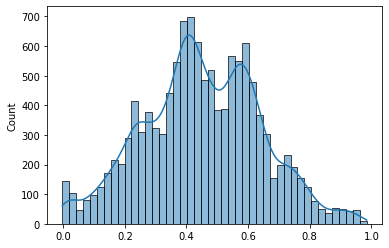

In [115]:
sns.histplot(actual_pred,kde=True)

THe behavior of the actual prediction tends to bimodal, but in general looks like the training dataset.

In [ ]:
df_pred = pd.DataFrame(actual_pred)
df_pred.columns = ['pred']

In [132]:
fig = px.histogram(data_frame=df_pred,x='pred',marginal='box')
fig.show()